<a href="https://colab.research.google.com/github/venuvardhan22/PRODIGY_DS_05/blob/main/Traffic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go

In [3]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
%matplotlib inline

import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *

import plotly.graph_objects as go
from nltk.corpus import stopwords

import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/Crash_Reporting_-_Drivers_Data.csv')
data

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15.0,No,No,2004.0,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40.0,No,No,2011.0,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35.0,No,No,2019.0,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40.0,No,No,2016.0,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35.0,No,No,2016.0,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,MCP3156000X,190030961,Montgomery County Police,Property Damage Crash,06/29/2019 05:30:00 AM,US (State),GEORGIA AVE,Maryland (State),BURLINGTON AVE,NaN,...,30.0,No,No,2015.0,LEXS,TK,NO MISUSE,38.987178,-77.026757,"(38.98717833, -77.02675667)"
18856,MCP3325000T,220027668,Montgomery County Police,Property Damage Crash,06/27/2022 04:19:00 PM,Maryland (State),NEW HAMPSHIRE AVE,County,LOCKWOOD DR,NaN,...,40.0,No,No,0.0,UNKNOWN,UNKNOWN,UNKNOWN,39.040142,-76.990010,"(39.04014167, -76.99001)"
18857,MCP30100030,180030806,Montgomery County Police,Property Damage Crash,06/22/2018 10:29:00 AM,Maryland (State),ROCKVILLE PIKE,Unknown,ENT TO GEORGETOWN PREP. SCHOOL,NaN,...,40.0,No,No,2017.0,AUDI,A3,NO MISUSE,39.034780,-77.107090,"(39.03478, -77.10709)"
18858,MCP25590016,16037976,Montgomery County Police,Injury Crash,07/27/2016 09:48:00 AM,Maryland (State),MONTGOMERY VILLAGE AVE,County,LOST KNIFE RD,NaN,...,35.0,No,No,2011.0,CHEVROLET,VAN,NO MISUSE,39.158962,-77.203310,"(39.15896167, -77.20331)"


In [5]:
data = data[['Driverless Vehicle','Route Type',
             'Vehicle First Impact Location','Weather','Surface Condition',
             'Light','Driver At Fault','Parked Vehicle','Speed Limit']]

In [6]:
data

,Driverless Vehicle,Route Type,Vehicle First Impact Location,Weather,Surface Condition,Light,Driver At Fault,Parked Vehicle,Speed Limit
0,No,NaN,ONE OCLOCK,CLEAR,NaN,DAYLIGHT,Yes,No,15.0
1,No,Maryland (State),THREE OCLOCK,CLEAR,DRY,DAYLIGHT,No,No,40.0
2,No,Maryland (State),TWELVE OCLOCK,CLEAR,DRY,DAYLIGHT,Yes,No,35.0
3,No,County,TWELVE OCLOCK,CLEAR,DRY,DAYLIGHT,Yes,No,40.0
4,No,County,TWELVE OCLOCK,CLOUDY,DRY,DAYLIGHT,Yes,No,35.0
...,...,...,...,...,...,...,...,...,...
18855,No,US (State),ONE OCLOCK,CLEAR,DRY,DAWN,No,No,30.0
18856,No,Maryland (State),FIVE OCLOCK,NaN,DRY,DAYLIGHT,Yes,No,40.0
18857,No,Maryland (State),SIX OCLOCK,RAINING,WET,DAYLIGHT,No,No,40.0
18858,No,Maryland (State),SIX OCLOCK,CLOUDY,DRY,DAYLIGHT,No,No,35.0


In [7]:
data.columns

Index(['Driverless Vehicle', 'Route Type', 'Vehicle First Impact Location',
       'Weather', 'Surface Condition', 'Light', 'Driver At Fault',
       'Parked Vehicle', 'Speed Limit'],
      dtype='object')

In [8]:
data.isna().sum()

Driverless Vehicle                  1
Route Type                       2102
Vehicle First Impact Location      10
Weather                          1465
Surface Condition                2379
Light                             191
Driver At Fault                     1
Parked Vehicle                      1
Speed Limit                         1
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.shape

(15114, 9)

In [11]:
data.isna().sum()

Driverless Vehicle               0
Route Type                       0
Vehicle First Impact Location    0
Weather                          0
Surface Condition                0
Light                            0
Driver At Fault                  0
Parked Vehicle                   0
Speed Limit                      0
dtype: int64

In [12]:
data

,Driverless Vehicle,Route Type,Vehicle First Impact Location,Weather,Surface Condition,Light,Driver At Fault,Parked Vehicle,Speed Limit
1,No,Maryland (State),THREE OCLOCK,CLEAR,DRY,DAYLIGHT,No,No,40.0
2,No,Maryland (State),TWELVE OCLOCK,CLEAR,DRY,DAYLIGHT,Yes,No,35.0
3,No,County,TWELVE OCLOCK,CLEAR,DRY,DAYLIGHT,Yes,No,40.0
4,No,County,TWELVE OCLOCK,CLOUDY,DRY,DAYLIGHT,Yes,No,35.0
5,No,County,SIX OCLOCK,CLEAR,DRY,DAYLIGHT,No,No,30.0
...,...,...,...,...,...,...,...,...,...
18853,No,Maryland (State),ELEVEN OCLOCK,CLEAR,DRY,DARK LIGHTS ON,Yes,No,35.0
18854,No,County,ELEVEN OCLOCK,CLEAR,DRY,DARK LIGHTS ON,No,No,30.0
18855,No,US (State),ONE OCLOCK,CLEAR,DRY,DAWN,No,No,30.0
18857,No,Maryland (State),SIX OCLOCK,RAINING,WET,DAYLIGHT,No,No,40.0


In [49]:
print(data['Route Type'].unique())
print(data['Vehicle First Impact Location'].unique())
print(data['Weather'].unique())
print(data['Surface Condition'].unique())
print(data['Light'].unique())
print(data['Driver At Fault'].unique())
print(data['Driverless Vehicle'].unique())

['Maryland (State)' 'County' 'US (State)' 'Municipality'
 'Interstate (State)' 'Other Public Roadway' 'Ramp' 'Government'
 'Service Road' 'Unknown']
['THREE OCLOCK' 'TWELVE OCLOCK' 'SIX OCLOCK' 'FOUR OCLOCK' 'UNKNOWN'
 'NINE OCLOCK' 'ONE OCLOCK' 'TEN OCLOCK' 'SEVEN OCLOCK' 'ELEVEN OCLOCK'
 'EIGHT OCLOCK' 'TWO OCLOCK' 'FIVE OCLOCK']
['CLEAR' 'CLOUDY' 'RAINING' 'UNKNOWN' 'FOGGY' 'OTHER' 'SNOW' 'SLEET'
 'WINTRY MIX' 'BLOWING SNOW' 'SEVERE WINDS']
['DRY' 'WET' 'UNKNOWN' 'MUD, DIRT, GRAVEL' 'ICE' 'WATER(STANDING/MOVING)'
 'SNOW' 'SLUSH' 'OTHER' 'OIL']
['DAYLIGHT' 'DUSK' 'External Lighting' 'DAWN' 'DARK NO LIGHTS']
['No' 'Yes' 'Unknown']
['No' 'Unknown']


In [79]:
data=data[(data['Surface Condition']!='OTHER') & (data['Surface Condition']!='UNKNOWN')]
Road_mapping = {'WATER(STANDING/MOVING)':'OTHER','SLUSH':'OTHER','OIL':'OTHER','GRAVEL':'OTHER','MUD':'OTHER'}
data['Surface Condition'] = data['Surface Condition'].replace(Road_mapping)
data.shape

(14887, 9)

In [60]:
data=data[(data['Weather']!='OTHER') & (data['Weather']!='UNKNOWN')]
data.shape

(14915, 9)

In [62]:
data['Weather'] = data['Weather'].replace('BLOWING SNOW','SNOW')
Weather_mapping = {'SNOW':'OTHER','SLEET':'OTHER','WINTRY MIX':'OTHER','SEVERE WINDS':'OTHER','BLOWING SNOW':'OTHER'}
data['Weather'] = data['Weather'].replace(Weather_mapping)

In [30]:
data=data[(data['Light']!='OTHER') & (data['Light']!='UNKNOWN')]
data.shape

(14986, 9)

In [40]:
mapping = {'DARK -- UNKNOWN LIGHTING' : 'External Lighting', 'DARK LIGHTS ON' : 'External Lighting'}
data['Light'] = data['Light'].replace(mapping)

In [44]:
rows,cols = data.shape
rows

14986

In [31]:
data = data[(data['Vehicle First Impact Location']!='NON-COLLISION') &
           (data['Vehicle First Impact Location']!='ROOF TOP') &
           (data['Vehicle First Impact Location']!='UNDERSIDE')]

In [15]:
data['Vehicle First Impact Location'].unique()

array(['THREE OCLOCK', 'TWELVE OCLOCK', 'SIX OCLOCK', 'FOUR OCLOCK',
       'UNKNOWN', 'NINE OCLOCK', 'ONE OCLOCK', 'TEN OCLOCK',
       'SEVEN OCLOCK', 'ELEVEN OCLOCK', 'EIGHT OCLOCK', 'TWO OCLOCK',
       'FIVE OCLOCK'], dtype=object)

In [17]:
data

,Driverless Vehicle,Route Type,Vehicle First Impact Location,Weather,Surface Condition,Light,Driver At Fault,Parked Vehicle,Speed Limit
1,No,Maryland (State),THREE OCLOCK,CLEAR,DRY,DAYLIGHT,No,No,40.0
2,No,Maryland (State),TWELVE OCLOCK,CLEAR,DRY,DAYLIGHT,Yes,No,35.0
3,No,County,TWELVE OCLOCK,CLEAR,DRY,DAYLIGHT,Yes,No,40.0
4,No,County,TWELVE OCLOCK,CLOUDY,DRY,DAYLIGHT,Yes,No,35.0
5,No,County,SIX OCLOCK,CLEAR,DRY,DAYLIGHT,No,No,30.0
...,...,...,...,...,...,...,...,...,...
18853,No,Maryland (State),ELEVEN OCLOCK,CLEAR,DRY,DARK LIGHTS ON,Yes,No,35.0
18854,No,County,ELEVEN OCLOCK,CLEAR,DRY,DARK LIGHTS ON,No,No,30.0
18855,No,US (State),ONE OCLOCK,CLEAR,DRY,DAWN,No,No,30.0
18857,No,Maryland (State),SIX OCLOCK,RAINING,WET,DAYLIGHT,No,No,40.0


Text(0, 0.5, 'Number of Accidents')

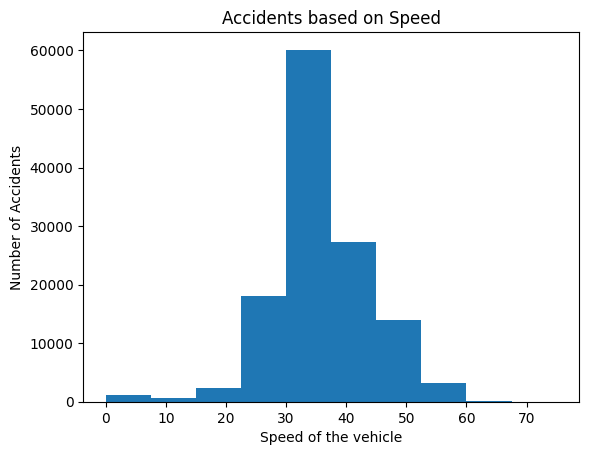

In [ ]:
plt.hist(data['Speed Limit'])
plt.title('Accidents based on Speed')
plt.xlabel('Speed of the vehicle')
plt.ylabel('Number of Accidents')

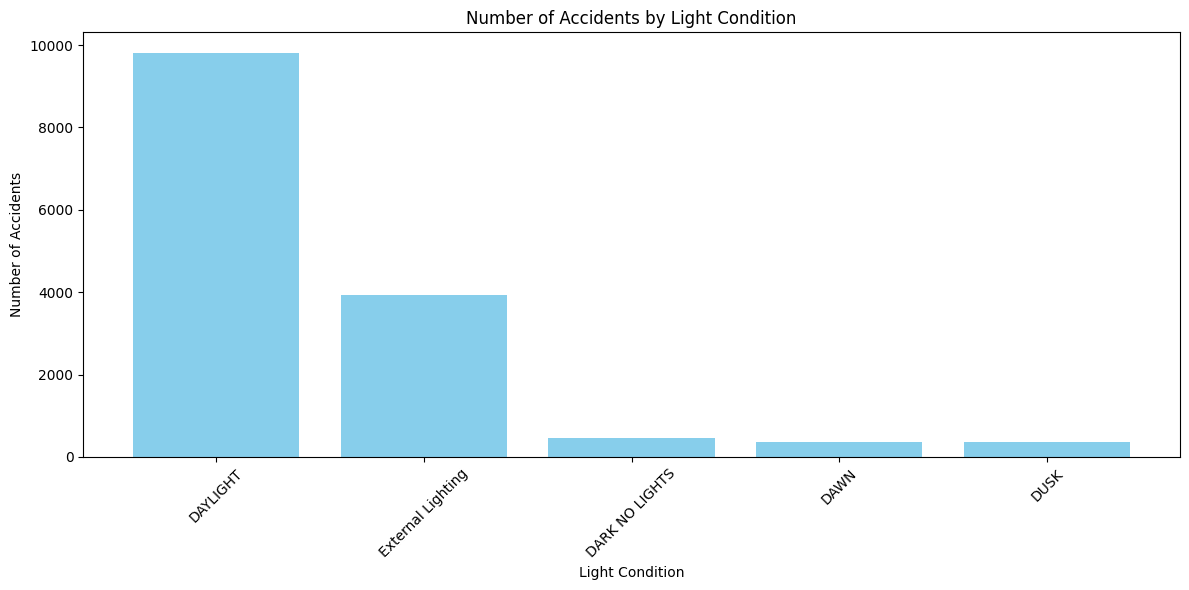

In [52]:
light_counts = data['Light'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(light_counts.index, light_counts.values, color='skyblue')
plt.title('Number of Accidents by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

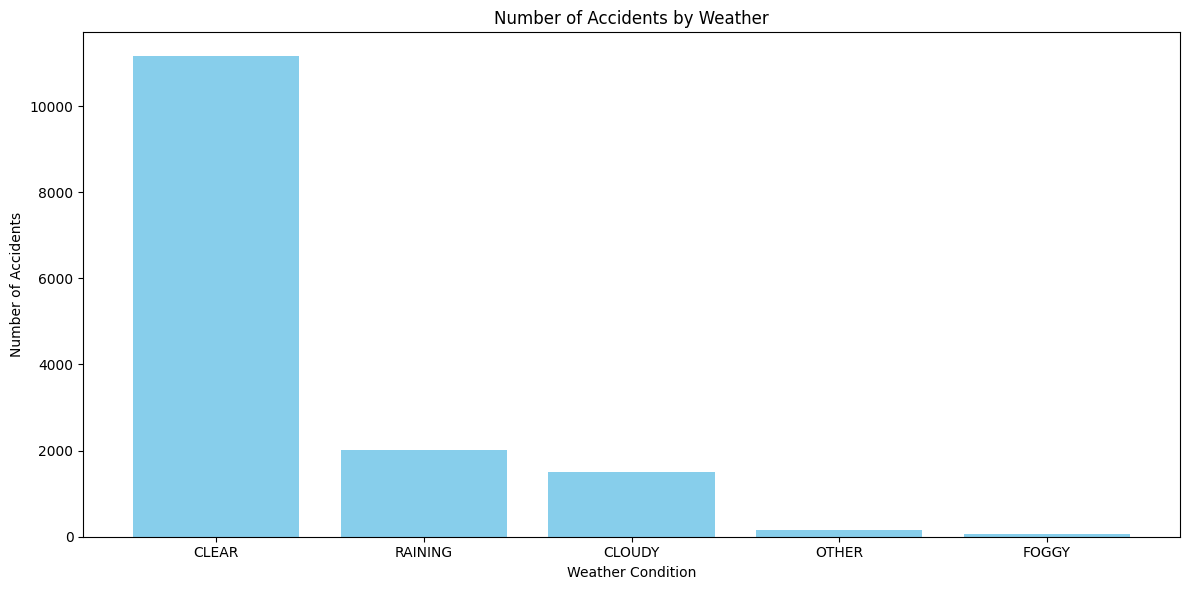

In [81]:
light_counts = data['Weather'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(light_counts.index, light_counts.values, color='skyblue')
plt.title('Number of Accidents by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

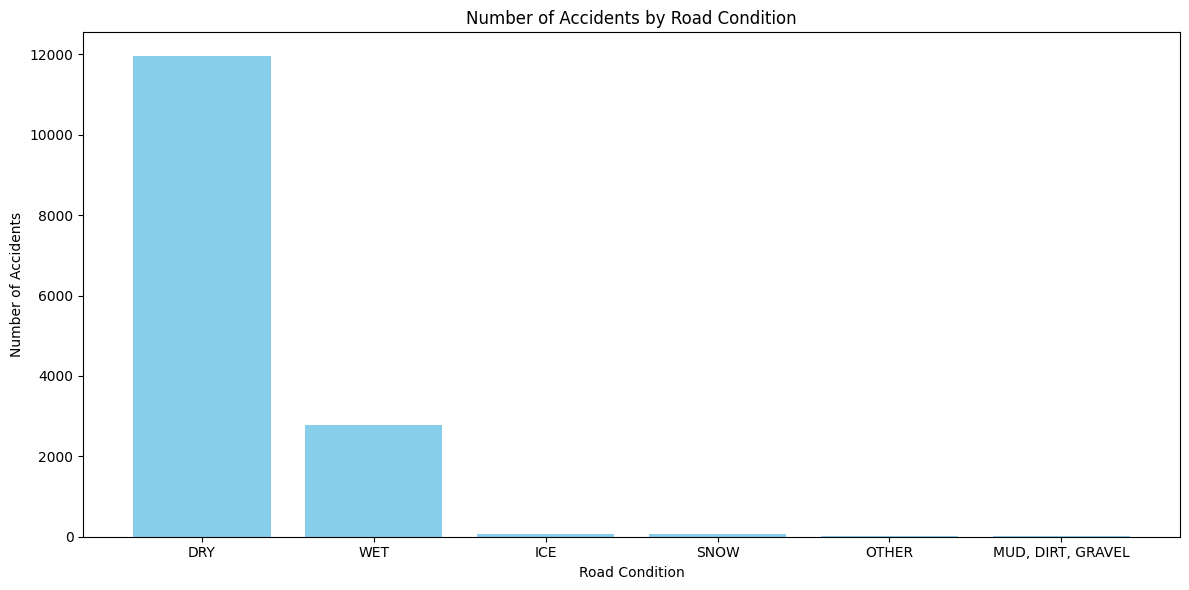

In [82]:
light_counts = data['Surface Condition'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(light_counts.index, light_counts.values, color='skyblue')
plt.title('Number of Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

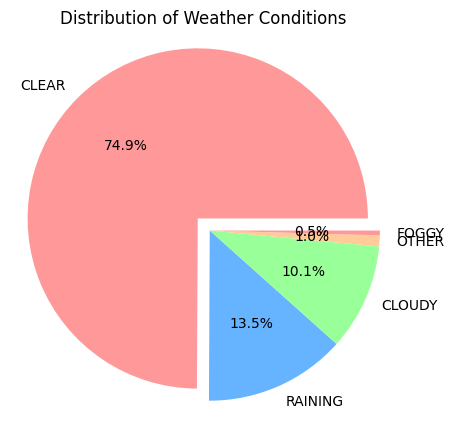

In [74]:
weather_counts=data['Weather'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1,) + (0,) * (len(weather_counts) - 1)
plt.figure(figsize=(5, 5))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Distribution of Weather Conditions')
plt.axis('equal')
plt.show()

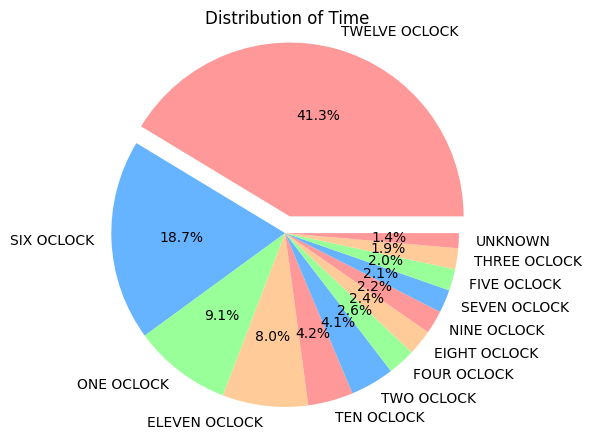

In [83]:
weather_counts=data['Vehicle First Impact Location'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1,) + (0,) * (len(weather_counts) - 1)
plt.figure(figsize=(5, 5))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Distribution of Time')
plt.axis('equal')
plt.show()